#First Stuff

In [ ]:
import requests
import pandas as pd
import time

# ClinVar API Endpoint for search
clinvar_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"

# Parameters for fetching SLC19A3 variants
params = {
    "db": "clinvar",
    "term": "SLC19A3[gene]",
    "retmode": "json",
    "retmax": 500  # Fetch up to 500 variants
}

# API Request for variant IDs
response = requests.get(clinvar_url, params=params)
data = response.json()

# Extract Variant IDs
variant_ids = data["esearchresult"]["idlist"]
print(f"Found {len(variant_ids)} SLC19A3 variants.")

# Prepare a list to store variant details
variant_details = []

# Loop over variant IDs, adding error checking
for var_id in variant_ids:
    details_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=clinvar&id={var_id}&retmode=json"
    var_response = requests.get(details_url)
    try:
        var_data = var_response.json()
        # Check if 'result' exists and the current variant ID is in the result
        if "result" not in var_data or var_id not in var_data["result"]:
            print(f"Variant ID {var_id} not found in result, skipping.")
            continue

        variant = var_data["result"][var_id]
        variant_details.append({
            "variant_id": var_id,
            "accession": variant.get("accession", "N/A"),
            "title": variant.get("title", "N/A"),
            "clinical_significance": variant.get("clinical_significance", "N/A"),
            "review_status": variant.get("review_status", "N/A"),
            "variation_type": variant.get("variation_type", "N/A"),
            "hgvs_c": variant.get("hgvs", {}).get("coding", "N/A") if variant.get("hgvs") else "N/A",
            "hgvs_p": variant.get("hgvs", {}).get("protein", "N/A") if variant.get("hgvs") else "N/A"
        })
    except Exception as e:
        print(f"Error processing variant ID {var_id}: {e}")
    # Add a short delay to avoid overloading the API
    time.sleep(0.1)

# Convert the results to a DataFrame and save as CSV
df = pd.DataFrame(variant_details)
df.to_csv("SLC19A3_ClinVar_Variants.csv", index=False)
print("Data saved as SLC19A3_ClinVar_Variants.csv")


Found 500 SLC19A3 variants.
Variant ID 3586158 not found in result, skipping.
Variant ID 3442967 not found in result, skipping.
Variant ID 3392283 not found in result, skipping.
Variant ID 3391994 not found in result, skipping.
Variant ID 3367977 not found in result, skipping.
Variant ID 3367836 not found in result, skipping.
Variant ID 3366990 not found in result, skipping.
Variant ID 3366703 not found in result, skipping.
Variant ID 3366568 not found in result, skipping.
Variant ID 3359968 not found in result, skipping.
Variant ID 3343364 not found in result, skipping.
Variant ID 3256820 not found in result, skipping.
Variant ID 3255303 not found in result, skipping.
Variant ID 3255275 not found in result, skipping.
Variant ID 3252296 not found in result, skipping.
Variant ID 3065708 not found in result, skipping.
Variant ID 3064540 not found in result, skipping.
Variant ID 3064134 not found in result, skipping.
Variant ID 3033872 not found in result, skipping.
Variant ID 3016813 not

In [ ]:
from google.colab import files
files.download("SLC19A3_ClinVar_Variants.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import requests
import pandas as pd
import time

# Load the CSV file with SLC19A3 variants
df = pd.read_csv("SLC19A3_ClinVar_Variants.csv")

# Function to fetch sequence using NCBI efetch
def fetch_variant_sequence(hgvs_notation):
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
    params = {
        "db": "nucleotide",
        "id": hgvs_notation,  # Use HGVS identifier
        "rettype": "fasta",
        "retmode": "text"
    }
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.text
    else:
        return "Sequence Not Found"

# Create a new column for sequences
df["sequence"] = df["title"].apply(fetch_variant_sequence)

# Save the updated dataset
df.to_csv("SLC19A3_ClinVar_Sequences.csv", index=False)

print("Sequences saved in SLC19A3_ClinVar_Sequences.csv")


Sequences saved in SLC19A3_ClinVar_Sequences.csv


In [ ]:
files.download("SLC19A3_ClinVar_Sequences.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import requests

def fetch_reference_sequence(chrom, pos, window=100):
    """
    Fetches the reference DNA sequence surrounding a variant position
    using UCSC Genome Browser API.

    :param chrom: Chromosome number (e.g., "chr2")
    :param pos: Variant position (e.g., 227685293)
    :param window: Number of bases to extract around the variant (default = 100)
    :return: Reference DNA sequence (wild-type)
    """
    base_url = "http://api.genome.ucsc.edu/getData/sequence"
    params = {
        "genome": "hg38",  # Using human genome build hg38
        "chrom": chrom,
        "start": max(0, pos - window),  # Ensure we don't go below 0
        "end": pos + window
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        return data.get("dna", "Sequence Not Found")
    else:
        return "Error retrieving sequence"

# Example usage
chrom = "chr2"
pos = 227685293  # Example variant position
wild_type_seq = fetch_reference_sequence(chrom, pos)
print(f"Wild-type Sequence: {wild_type_seq}")
print (f"Length of Sequence: {len(wild_type_seq)}")


Wild-type Sequence: aacacctgagactagatagtttgtaagaaaaggggtttaattagctcacaggctatataggaagcgtggcaacatctgcttctagggagtcctcggggaatttttactcatggcagaaggcaaagtgggagcaggcatcttcacgtggccaaagcaggagaaagagagagtggggaggtgctacacacttttaaactacc
Length of Sequence: 200


#Comparison

In [1]:
from google.colab import files

# Upload the file
print("Upload your gene sequence file:")


# Get the file name
file_name = list(uploaded.keys())[0]

# Read the file and store it in GENE1
with open(file_name, "r") as file:
    lines = file.readlines()

# Remove headers (lines starting with '>') and join sequence into a single string
GENE1 = "".join(line.strip() for line in lines if not line.startswith(">"))

# Print confirmation
print(f"\nFile '{file_name}' uploaded successfully!")
print(f"Stored in variable: GENE1")
print(f"First 100 bases of GENE1: {GENE1[:100]}...")


Upload your gene sequence file:


NameError: name 'uploaded' is not defined

In [ ]:
len()

34266

In [ ]:
print("Upload your gene sequence file:")
# Get the file name
file_name_2 = list(uploaded.keys())[0]

# Read the file and store it in GENE1
with open(file_name, "r") as file:
    lines = file.readlines()

# Remove headers (lines starting with '>') and join sequence into a single string
GENE2 = "".join(line.strip() for line in lines if not line.startswith(">"))



Upload your gene sequence file:


NameError: name 'uploaded' is not defined

In [ ]:
# Print confirmation
print(f"\nFile '{file_name_2}' uploaded successfully!")
print(f"Stored in variable: GENE2")
print(f"First 100 bases of GENE2: {GENE2[:100]}...")


File 'gene2 (1).txt' uploaded successfully!
Stored in variable: GENE2
First 100 bases of GENE2: AAGAGCGCCTGGATCCATCCGACAGCCGCGGGTGCGTGGTCGTGCGGCAAGTGAGCGATTTGGTGAACAGACACTCCCTTCTGTAGGTAAGAATATCTCG...


In [ ]:
len (GENE2)


34266

In [ ]:
number_of_differences = 0
for i in range (len(GENE1)):
  if GENE1[i] != GENE2[i]:
    print(i)
    number_of_differences += 1
  if i % 1000 == 0:
    print(f' Base {i} {GENE1[i]} and {GENE2[i]}')
print(number_of_differences)

 Base 0 A and A
 Base 1000 T and T
 Base 2000 T and T
 Base 3000 G and G
 Base 4000 C and C
 Base 5000 A and A
 Base 6000 G and G
 Base 7000 G and G
 Base 8000 A and A
 Base 9000 T and T
 Base 10000 G and G
 Base 11000 G and G
 Base 12000 T and T
 Base 13000 G and G
 Base 14000 C and C
 Base 15000 C and C
 Base 16000 A and A
 Base 17000 C and C
 Base 18000 G and G
 Base 19000 A and A
 Base 20000 C and C
 Base 21000 C and C
 Base 22000 G and G
 Base 23000 G and G
 Base 24000 G and G
 Base 25000 T and T
 Base 26000 T and T
 Base 27000 A and A
 Base 28000 T and T
 Base 29000 T and T
 Base 30000 A and A
 Base 31000 T and T
 Base 32000 G and G
 Base 33000 C and C
 Base 34000 T and T
0


In [ ]:
print (GENE1[2])

G


In [ ]:
import os

# List all files in the default Google Colab upload directory
uploaded_files = os.listdir()

# Print all file names
print("Uploaded Files:")
for index, file in enumerate(uploaded_files):

    print(index, file)

Uploaded Files:
0 .config
1 SLC19A3_ClinVar_Sequences.csv
2 SLC19A3_ClinVar_Variants.csv
3 sample_data


In [ ]:
import os

# List all uploaded files
uploaded_files = os.listdir()

# Select files at index 5 and 6
file_name_1 = uploaded_files[5]  # Gene 1 file
file_name_2 = uploaded_files[6]  # Gene 2 file

# Function to load gene sequences
def load_gene_sequence(file_path):
    """
    Reads a DNA sequence from a file and removes headers.

    :param file_path: Path to the text file
    :return: DNA sequence as a string
    """
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Remove headers (lines starting with '>')
    gene_seq = "".join(line.strip() for line in lines if not line.startswith(">"))

    return gene_seq

# Load sequences from selected files
GENE1 = load_gene_sequence(file_name_1)
GENE2 = load_gene_sequence(file_name_2)

# Print confirmation
print(f"\nFile '{file_name_1}' (GENE1) and '{file_name_2}' (GENE2) loaded successfully!")
print(f"GENE1 Length: {len(GENE1)}")
print(f"GENE2 Length: {len(GENE2)}")

# Compare sequences
number_of_differences = 0
min_length = min(len(GENE1), len(GENE2))

for i in range(min_length):
    if GENE1[i] != GENE2[i]:  # Detect mutation
        print(f"Difference at position {i}: {GENE1[i]} -> {GENE2[i]}")
        number_of_differences += 1

    if i % 1000 == 0:  # Print every 1000th base
        print(f"Base {i}: {GENE1[i]} and {GENE2[i]}")

# If one sequence is longer, report the extra bases
if len(GENE1) != len(GENE2):
    print(f"\nWarning: Sequences are of different lengths!")
    longer_seq = "GENE1" if len(GENE1) > len(GENE2) else "GENE2"
    print(f"Extra bases found in {longer_seq} starting at index {min_length}: {GENE1[min_length:] if longer_seq == 'GENE1' else GENE2[min_length:]}")

# Print total differences
print(f"\nTotal Differences Found: {number_of_differences}")



File 'gene (2).txt' (GENE1) and 'gene2.txt' (GENE2) loaded successfully!
GENE1 Length: 34266
GENE2 Length: 34260
Base 0: A and A
Difference at position 491: G -> A
Base 1000: T and T
Difference at position 1034: A -> G
Difference at position 1035: G -> C
Difference at position 1036: C -> A
Difference at position 1037: A -> C
Difference at position 1038: C -> T
Difference at position 1039: T -> C
Difference at position 1040: C -> T
Difference at position 1041: T -> C
Difference at position 1042: C -> A
Difference at position 1043: A -> T
Difference at position 1044: T -> G
Difference at position 1045: G -> T
Difference at position 1046: T -> G
Difference at position 1047: G -> T
Difference at position 1051: T -> G
Difference at position 1052: G -> C
Difference at position 1053: C -> T
Difference at position 1054: T -> C
Difference at position 1056: C -> T
Difference at position 1057: T -> A
Difference at position 1058: A -> T
Difference at position 1059: T -> C
Difference at position 1

In [ ]:
print(f"Extra bases in GENE1 after index {len(GENE2)}: {GENE1[len(GENE2):]}")


Extra bases in GENE1 after index 34260: TACCAA


In [ ]:
from difflib import ndiff

diffs = list(ndiff(GENE1, GENE2))

for i, diff in enumerate(diffs):
    if diff[0] != ' ':
        print(f"Position {i}: {diff}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-f9eb90129005>", line 3, in <cell line: 0>
    diffs = list(ndiff(GENE1, GENE2))
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/difflib.py", line 872, in compare
    yield from g
  File "/usr/lib/python3.11/difflib.py", line 985, in _fancy_replace
    yield from self._fancy_helper(a, best_i+1, ahi, b, best_j+1, bhi)
  File "/usr/lib/python3.11/difflib.py", line 997, in _fancy_helper
    yield from g
  File "/usr/lib/python3.11/difflib.py", line None, in _fancy_replace
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^

In [ ]:
print(len(GENE1), len(GENE2))

34266 34260


It Looks like both Genes are identical.

#Variants Data Loading

In [ ]:
# lets load the data of SLC19A3 Variants from dSNP data base of NCBI
print("Upload your the variants:")
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the file and store it in GENE1
with open(file_name, "r") as file:
    lines = file.readlines()

# Remove headers (lines starting with '>') and join sequence into a single string
GENE1 = "".join(line.strip() for line in lines if not line.startswith(">"))

# Print confirmation
print(f"\nFile '{file_name}' uploaded successfully!")
print(f"Stored in variable: GENE1")
print(f"First 100 bases of GENE1: {GENE1[:100]}...")

Upload your the variants:


Saving snp_result.txt to snp_result.txt

File 'snp_result.txt' uploaded successfully!
Stored in variable: GENE1
First 100 bases of GENE1: #chr	pos	variation	variant_type	snp_id	clinical_significance	validation_status	function_class	gene	f...


In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Step 2: Get the file name (assuming one file is uploaded)
file_name = list(uploaded.keys())[0]
print(f"File '{file_name}' uploaded successfully!")

# Step 3: Parse the file into a DataFrame (assuming it's tab-separated)
df = pd.read_csv(file_name, sep="\t")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# Step 4: Save the DataFrame as a CSV file
csv_file_name = "parsed_file.csv"
df.to_csv(csv_file_name, index=False)
print(f"\nData saved as '{csv_file_name}'.")

# Step 5: Download the CSV file
files.download(csv_file_name)


Please upload your file:


Saving snp_result.txt to snp_result (1).txt
File 'snp_result (1).txt' uploaded successfully!

First 5 rows of the DataFrame:
  #chr        pos variation variant_type   snp_id clinical_significance  \
0    2  227685293       A>G          snv  1055957                benign   
1    2  227685434       G>A          snv  1134281                benign   
2    2  227685423       C>A          snv  1134282                benign   
3    2  227718030     G>A,C          snv  4972919                benign   
4    2  227702382       C>T          snv  6713116                benign   

                 validation_status  \
0  by-frequency;by-alfa;by-cluster   
1  by-frequency;by-alfa;by-cluster   
2  by-frequency;by-alfa;by-cluster   
3  by-frequency;by-alfa;by-cluster   
4  by-frequency;by-alfa;by-cluster   

                                     function_class     gene  \
0                               3_prime_UTR_variant  SLC19A3   
1                               3_prime_UTR_variant  SLC19A3   
2  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Assuming file_name is already defined from a previous upload, e.g.:
# file_name = "snp_result.txt"
print(f"Using previously uploaded file: {file_name}")

# Load the file into a DataFrame (assuming it's tab-separated)
df = pd.read_csv(file_name, sep="\t")
print("First 5 rows before cleaning:")
print(df.head())

# Remove rows that repeat the column header.
# We'll assume that any row where the first column's value equals the header name should be dropped.
header_name = df.columns[0]
df_clean = df[df[header_name] != header_name].copy()

print("\nFirst 5 rows after cleaning:")
print(df_clean.head())

# Save the cleaned DataFrame as a CSV file
csv_file_name = "parsed_file_cleaned.csv"
df_clean.to_csv(csv_file_name, index=False)
print(f"\nCleaned data saved as '{csv_file_name}'.")

# Download the CSV file
files.download(csv_file_name)


NameError: name 'file_name' is not defined

In [ ]:
import pandas as pd
import requests

def fetch_single_base(chrom, pos):
    """
    Fetch a single base from the UCSC Genome Browser API (hg38) at the given position.
    The API uses 0-indexed start, so we convert pos (assumed 1-indexed) accordingly.
    Returns the base in uppercase.
    """
    ucsc_start = pos - 1  # Convert to 0-indexed
    url = f"http://api.genome.ucsc.edu/getData/sequence?genome=hg38;chrom={chrom};start={ucsc_start};end={pos+1}"
    response = requests.get(url)
    if response.status_code == 200:
        try:
            data = response.json()
            dna = data.get("dna", "").upper()
            return dna
        except Exception as e:
            print(f"Error decoding JSON for {chrom} at {pos}: {e}")
            return ""
    else:
        print(f"Error fetching base for {chrom} at {pos}: Status code {response.status_code}")
        return ""

# Load the cleaned CSV file (assuming it's already uploaded)
df = pd.read_csv("parsed_file_cleaned.csv", sep=",")  # Adjust the separator if needed
print("Loaded variant data. Number of rows:", len(df))

# Optional: Limit to first 10 variants for testing
# df = df.head(10)

print("\nChecking wild-type bases for each variant:")

# Loop through each variant and check the wild-type base
for index, row in df.iterrows():
    # Get variant information
    chrom = str(row["#chr"])  # assuming column name is "#chr"
    pos = int(row["pos"])
    variation = row["variation"]
    snp_id = row["snp_id"]

    # Expected wild-type base is the first letter of the variation string (e.g., "A" in "A>G")
    expected_wt = variation.split(">")[0].upper().strip()

    # Ensure chromosome is in proper format (e.g., "chr2")
    if not chrom.startswith("chr"):
        chrom = "chr" + chrom

    # Fetch the base at the variant position
    base_from_api = fetch_single_base(chrom, pos)

    # Compare and print results
    if base_from_api == expected_wt:
        print(f"snp_id {snp_id}: Match at pos {pos}. Base from API: {base_from_api}")
    else:
        print(f"snp_id {snp_id}: MISMATCH at pos {pos}. Expected: {expected_wt}, Got: {base_from_api}")


Loaded variant data. Number of rows: 14390

Checking wild-type bases for each variant:
snp_id 1055957: MISMATCH at pos 227685293. Expected: A, Got: AT
snp_id 1134281: MISMATCH at pos 227685434. Expected: G, Got: GG
snp_id 1134282: MISMATCH at pos 227685423. Expected: C, Got: CC
snp_id 4972919: MISMATCH at pos 227718030. Expected: G, Got: GT
snp_id 6713116: MISMATCH at pos 227702382. Expected: C, Got: CG
snp_id 6721696: MISMATCH at pos 227695616. Expected: T, Got: TA
snp_id 6728344: MISMATCH at pos 227702330. Expected: T, Got: TG
snp_id 6745885: MISMATCH at pos 227696327. Expected: C, Got: CG
snp_id 7593437: MISMATCH at pos 227685288. Expected: G, Got: GG
snp_id 7602410: MISMATCH at pos 227698523. Expected: C, Got: CC
snp_id 11334205: Match at pos 227696085. Base from API: AA
snp_id 12105323: MISMATCH at pos 227685657. Expected: C, Got: CT
snp_id 12105610: MISMATCH at pos 227685970. Expected: A, Got: AC
snp_id 12105737: MISMATCH at pos 227685713. Expected: T, Got: TT
snp_id 12185721: MI

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import requests
import re

def fetch_single_base(chrom, pos):
    """
    Fetch a single base from the UCSC Genome Browser API (hg38) at the given position.
    UCSC API uses 0-indexed start and an exclusive end.
    To fetch exactly one base for a 1-indexed position `pos`:
      - start = pos - 1
      - end = pos
    Returns the base as an uppercase string.
    """
    ucsc_start = pos - 1  # convert to 0-indexed
    url = f"http://api.genome.ucsc.edu/getData/sequence?genome=hg38;chrom={chrom};start={ucsc_start};end={pos}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            data = response.json()
            dna = data.get("dna", "").upper()
            return dna
        except Exception as e:
            print(f"Error decoding JSON for {chrom} at {pos}: {e}")
            return ""
    else:
        print(f"Error fetching base for {chrom} at {pos}: Status code {response.status_code}")
        return ""

def parse_expected_base(variation_str):
    """
    Extracts the first valid single nucleotide (A, C, G, or T) from the expected wild-type base before '>'.
    - Ignores insertions, deletions, or multi-base sequences.
    - Returns None if no valid single nucleotide base is found.
    """
    match = re.match(r"([ACGT])", variation_str.strip().upper())
    return match.group(1) if match else None

def main():
    # Load the cleaned CSV file
    df = pd.read_csv("parsed_file_cleaned.csv", sep=",")
    print("Loaded variant data. Number of rows:", len(df))
    matches = 0
    # Loop through variants
    for index, row in df.iterrows():
        chrom = str(row["#chr"])
        pos = int(row["pos"])
        variation = row["variation"]
        snp_id = row["snp_id"]

        # Format chromosome (e.g., "chr2")
        if not chrom.startswith("chr"):
            chrom = "chr" + chrom

        expected_base = parse_expected_base(variation)

        if expected_base:  # Process only valid SNPs
            base_from_api = fetch_single_base(chrom, pos)

            # Compare expected base to API returned base
            if base_from_api == expected_base:
                print(f"snp_id {snp_id}: Match at pos {pos}. Expected: {expected_base}, Got: {base_from_api}")
                matches += 1
                if matches % 100 == 0:
                    print(f"Matches so far: {matches}")
            else:
                print(f"snp_id {snp_id}: MISMATCH at pos {pos}. Expected: {expected_base}, Got: {base_from_api}")
        else:
            print(f"snp_id {snp_id}: Skipped (Not a valid SNP). Variation: {variation}")

        # Optional: Uncomment the following lines to limit processing for testing
        # if index >= 10:
        #     break

if __name__ == "__main__":
    main()


Loaded variant data. Number of rows: 14390
snp_id 1055957: Match at pos 227685293. Expected: A, Got: A
Error decoding JSON for chr2 at 227685434: Expecting value: line 1 column 1 (char 0)
snp_id 1134281: MISMATCH at pos 227685434. Expected: G, Got: 
snp_id 1134282: Match at pos 227685423. Expected: C, Got: C
Error decoding JSON for chr2 at 227718030: Expecting value: line 1 column 1 (char 0)
snp_id 4972919: MISMATCH at pos 227718030. Expected: G, Got: 
snp_id 6713116: Match at pos 227702382. Expected: C, Got: C
snp_id 6721696: Match at pos 227695616. Expected: T, Got: T
snp_id 6728344: Match at pos 227702330. Expected: T, Got: T
snp_id 6745885: Match at pos 227696327. Expected: C, Got: C
snp_id 7593437: Match at pos 227685288. Expected: G, Got: G
snp_id 7602410: Match at pos 227698523. Expected: C, Got: C
snp_id 11334205: Match at pos 227696085. Expected: A, Got: A
snp_id 12105323: Match at pos 227685657. Expected: C, Got: C
snp_id 12105610: Match at pos 227685970. Expected: A, Got: A


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import requests
import re

def fetch_single_base(chrom, pos):
    """
    Fetch a single base from the UCSC Genome Browser API (hg38) at the given position.
    UCSC API uses 0-indexed start and an exclusive end.
    For a 1-indexed position `pos`, we use:
      - start = pos - 1
      - end = pos
    Returns the base as an uppercase string.
    """
    ucsc_start = pos - 1  # convert to 0-indexed
    url = f"http://api.genome.ucsc.edu/getData/sequence?genome=hg38;chrom={chrom};start={ucsc_start};end={pos}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            data = response.json()
            dna = data.get("dna", "").upper()
            return dna
        except Exception as e:
            print(f"Error decoding JSON for {chrom} at {pos}: {e}")
            return ""
    else:
        print(f"Error fetching base for {chrom} at {pos}: Status code {response.status_code}")
        return ""

def fetch_sequence_region(chrom, start_pos, end_pos):
    """
    Fetch the sequence from UCSC for the region [start_pos, end_pos] inclusive.
    Both start_pos and end_pos are 1-indexed.
    UCSC API uses:
      - 0-indexed start (start_pos - 1)
      - an exclusive end, so end_pos is used as given.
    This returns the sequence as an uppercase string.
    """
    ucsc_start = start_pos - 1
    url = f"http://api.genome.ucsc.edu/getData/sequence?genome=hg38;chrom={chrom};start={ucsc_start};end={end_pos}"
    response = requests.get(url)
    if response.status_code == 200:
        try:
            data = response.json()
            seq = data.get("dna", "").upper()
            return seq
        except Exception as e:
            print(f"Error decoding JSON for {chrom} region {start_pos}-{end_pos}: {e}")
            return ""
    else:
        print(f"Error fetching region for {chrom} {start_pos}-{end_pos}: Status code {response.status_code}")
        return ""

def parse_expected_base(variation_str):
    """
    Extract the first valid single nucleotide (A, C, G, or T) from the expected wild-type base before '>'.
    This ignores insertions, deletions, or multi-base sequences.
    Returns None if no valid single nucleotide is found.
    """
    match = re.match(r"([ACGT])", variation_str.strip().upper())
    return match.group(1) if match else None

def main():
    # Load the cleaned CSV file
    df = pd.read_csv("parsed_file_cleaned.csv", sep=",")
    print("Loaded variant data. Number of rows:", len(df))

    # This list will hold dictionaries with snp_id and extended sequence
    sequence_data = []
    matches = 0

    # Loop through each variant
    for index, row in df.iterrows():
        chrom = str(row["#chr"])
        pos = int(row["pos"])
        variation = row["variation"]
        snp_id = row["snp_id"]

        # Ensure chromosome is in the correct format (e.g., "chr2")
        if not chrom.startswith("chr"):
            chrom = "chr" + chrom

        expected_base = parse_expected_base(variation)

        if expected_base:  # Only process valid SNPs
            base_from_api = fetch_single_base(chrom, pos)

            # Compare expected base to the API returned base
            if base_from_api == expected_base:
                print(f"snp_id {snp_id}: Match at pos {pos}. Expected: {expected_base}, Got: {base_from_api}")
                # Define region boundaries: 5000 bases before and 5000 bases after the variant.
                region_start = pos - 5000
                region_end = pos + 5000
                region_sequence = fetch_sequence_region(chrom, region_start, region_end)
                # Store the variant id and its extended sequence
                sequence_data.append({"snp_id": snp_id, "sequence": region_sequence})
                matches += 1
                print (f'matches # {matches}')
                if matches == 15000:
                    break
            else:
                print(f"snp_id {snp_id}: MISMATCH at pos {pos}. Expected: {expected_base}, Got: {base_from_api}")
        else:
            print(f"snp_id {snp_id}: Skipped (Not a valid SNP). Variation: {variation}")

        # Optionally, for testing, break after a few variants:
        # if index >= 10:
        #     break

    # If we found any matches, save the extended sequences to a CSV file.
    if sequence_data:
        seq_df = pd.DataFrame(sequence_data)
        seq_df.to_csv("extended_sequences.csv", index=False)
        print("Saved extended sequences for matched SNPs to 'extended_sequences.csv'")
    else:
        print("No matched SNPs found with extended sequences.")

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: 'parsed_file_cleaned.csv'

In [ ]:
import pandas as pd
import requests

def fetch_flank_sequence(chrom, pos, flank=5000):
    """
    Fetch the sequence of length (2*flank + 1) from the UCSC Genome Browser (hg38),
    centered at 1-based 'pos'.
    UCSC API uses 0-indexed start and an exclusive end.
    """
    start_0_based = max(0, (pos - 1) - flank)
    end_0_based = (pos - 1) + flank + 1  # +1 because UCSC end is exclusive

    url = (
        "http://api.genome.ucsc.edu/getData/sequence"
        f"?genome=hg38;chrom={chrom};start={start_0_based};end={end_0_based}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        try:
            data = response.json()
            dna = data.get("dna", "").upper()
            return dna
        except Exception as e:
            print(f"Error decoding JSON for {chrom}:{pos} - {e}")
            return ""
    else:
        print(f"Error fetching flank sequence for {chrom}:{pos} - Status {response.status_code}")
        return ""

def parse_variants(variation_str):
    """
    Parse the variation string into:
      - wild_type (string before '>')
      - list_of_mutations (comma-separated strings after '>')
    Example:
      "A>G"         -> wild_type="A", list_of_mutations=["G"]
      "G>A,C"       -> wild_type="G", list_of_mutations=["A","C"]
      "TTTT>-,-,TT" -> wild_type="TTTT", list_of_mutations=["-","-","TT"]
      "- > A"       -> wild_type="-",  list_of_mutations=["A"]  (Insertion)
      "A > -"       -> wild_type="A",  list_of_mutations=["-"]  (Deletion)
    """
    try:
        parts = variation_str.split(">")
        wild_type = parts[0].strip().upper() if len(parts) > 0 else ""
        if len(parts) > 1:
            mutations = [m.strip().upper() for m in parts[1].split(",")]
        else:
            mutations = []
        return wild_type, mutations
    except Exception as e:
        print(f"Error parsing variation '{variation_str}': {e}")
        return "", []

# Load the cleaned CSV file
df = pd.read_csv("parsed_file_cleaned.csv", sep=",")
print("Loaded variant data. Number of rows:", len(df))

# Prepare a list of dictionaries for constructing a new DataFrame
new_rows = []

# We'll process a subset of rows for demonstration (change as needed)
for idx, row in df.head(1000).iterrows():
    chrom = str(row["#chr"])
    pos = int(row["pos"])
    variation = row["variation"]
    snp_id = row["snp_id"]
    if idx % 100 == 0:
        print(f"Processing row {idx}...")

    # Ensure the chromosome format (e.g., "chr2")
    if not chrom.startswith("chr"):
        chrom = "chr" + chrom

    # Parse the variation (could have multiple possible mutations)
    wild_type, mutation_list = parse_variants(variation)

    # Fetch the ~10 kb sequence around the position
    flank_seq = fetch_flank_sequence(chrom, pos, flank=5000)
    if not flank_seq:
        # Could not fetch sequence; skip adding to new_rows
        continue

    # Calculate offsets for extracting the wild-type substring
    start_0_based = max(0, (pos - 1) - 5000)
    center_offset = (pos - 1) - start_0_based

    # Extract the reference substring from the flank sequence
    # If wild_type = "-", length is 1 for placeholder. Otherwise, it's len(wild_type).
    ref_substring = flank_seq[center_offset : center_offset + len(wild_type)]

    # -----------------------------------------------------------
    # Check for mismatch (only if wild_type != "-")
    # If mismatch, SKIP this row (do not include in final DataFrame).
    # -----------------------------------------------------------
    if wild_type != "-" and ref_substring.upper() != wild_type.upper():
        print(
            f"snp_id {snp_id}: MISMATCH at pos {pos}. "
            f"Expected wild-type '{wild_type}', Got: '{ref_substring}'. Skipping..."
        )
        continue

    # -----------------------------------------------------------
    # If no mismatch, build a dictionary for this row
    # -----------------------------------------------------------
    row_dict = row.to_dict()
    row_dict["WildSequence"] = flank_seq  # The 10k region (wild type)

    # Generate mutated sequences for each mutation in mutation_list
    for i, mut in enumerate(mutation_list, start=1):
        if wild_type == "-":
            # CASE: WILD-TYPE IS "-" => INSERTION
            mutated_seq = (
                flank_seq[:center_offset] +
                mut +
                flank_seq[center_offset:]
            )
        elif mut == "-":
            # CASE: MUTATION IS "-" => DELETION
            mutated_seq = (
                flank_seq[:center_offset] +
                flank_seq[center_offset + len(wild_type):]
            )
        else:
            # CASE: STANDARD REPLACEMENT
            mutated_seq = (
                flank_seq[:center_offset] +
                mut +
                flank_seq[center_offset + len(wild_type):]
            )

        # Store this mutated sequence in a column, e.g. MutatedSequence_1, _2, etc.
        row_dict[f"MutatedSequence_{i}"] = mutated_seq

    new_rows.append(row_dict)

# Convert the list of dictionaries into a new DataFrame
new_df = pd.DataFrame(new_rows)

# Find how many mutation columns we created at most
max_mutations = 0
for col in new_df.columns:
    if col.startswith("MutatedSequence_"):
        idx_str = col.replace("MutatedSequence_", "")
        try:
            idx_val = int(idx_str)
            if idx_val > max_mutations:
                max_mutations = idx_val
        except:
            pass

print(f"Maximum number of mutation columns created: {max_mutations}")

# Save to CSV (for the first 1000 rows processed)
new_df.to_csv("parsed_file_with_flanks_first1000_filtered.csv", index=False)

print("Done. The output with flanking sequences and mutated sequences is in 'parsed_file_with_flanks_first1000_filtered.csv'.")


Loaded variant data. Number of rows: 14390
Processing row 0...
snp_id 140315029: MISMATCH at pos 227695612. Expected wild-type 'TAAAA', Got: 'AAAAT'. Skipping...
Processing row 100...
snp_id 539344508: MISMATCH at pos 227686798. Expected wild-type 'ATA', Got: 'AAT'. Skipping...
Processing row 200...
snp_id 763130915: MISMATCH at pos 227699210. Expected wild-type 'GAC', Got: 'ACG'. Skipping...
Processing row 300...
snp_id 1553568249: MISMATCH at pos 227688201. Expected wild-type 'TAC', Got: 'CTA'. Skipping...
snp_id 1574558558: MISMATCH at pos 227698790. Expected wild-type 'GGCGCCTTGTAATCCCACAGGATTTGAACAT', Got: 'ATGGCGCCTTGTAATCCCACAGGATTTGAAC'. Skipping...
snp_id 2106317211: MISMATCH at pos 227687444. Expected wild-type 'CA', Got: 'AC'. Skipping...
Processing row 400...
snp_id 140315029: MISMATCH at pos 227695612. Expected wild-type 'TAAAA', Got: 'AAAAT'. Skipping...
Processing row 500...
snp_id 10634783: MISMATCH at pos 227711423. Expected wild-type 'AATAAAATAAAATAA', Got: 'AAAATAAAA

In [ ]:
files.download("parsed_file_with_flanks_first1000_filtered.csv")  # Correct the file name


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def unify_label(label_str):
    """
    Convert the raw 'clinical_significance' string into a single unified label
    by applying a priority-based system.
    """
    # Lowercase everything for consistent matching
    norm_str = label_str.lower()

    # Replace synonyms/compound labels with simpler tokens
    # e.g. "benign-likely-benign" -> "likely-benign"
    #      "pathogenic-likely-pathogenic" -> "likely-pathogenic"
    norm_str = norm_str.replace("benign-likely-benign", "likely-benign")
    norm_str = norm_str.replace("pathogenic-likely-pathogenic", "likely-pathogenic")

    # Split on semicolons in case multiple categories are listed
    parts = [p.strip() for p in norm_str.split(';')]
    unique_labels = set(parts)

    # Apply priority-based logic:
    # 1) If "pathogenic" is in the set -> "pathogenic"
    # 2) elif "conflicting-interpretations-of-pathogenicity" in set -> "conflicting"
    # 3) elif "likely-pathogenic" in set -> "likely-pathogenic"
    # 4) elif "uncertain-significance" in set -> "uncertain-significance"
    # 5) elif "likely-benign" in set -> "likely-benign"
    # 6) elif "benign" in set -> "benign"
    # else -> "unknown"
    if "pathogenic" in unique_labels:
        return "pathogenic"
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels:
        return "conflicting"
    elif "likely-pathogenic" in unique_labels:
        return "likely-pathogenic"
    elif "uncertain-significance" in unique_labels:
        return "uncertain-significance"
    elif "likely-benign" in unique_labels:
        return "likely-benign"
    elif "benign" in unique_labels:
        return "benign"
    else:
        return "unknown"


#Process the data

In [ ]:
# filename = files.upload()

filename = list(filename.keys())[0]

# Read the CSV file
df = pd.read_csv(filename, nrows=447)

# Display the first few rows
df.head()

AttributeError: 'str' object has no attribute 'keys'

In [ ]:
print(df.iloc[0, :100])

#chr                                                                     2
pos                                                              227685293
variation                                                              A>G
variant_type                                                           snv
snp_id                                                             1055957
clinical_significance                                               benign
validation_status                          by-frequency;by-alfa;by-cluster
function_class                                         3_prime_UTR_variant
gene                                                               SLC19A3
frequency                G:0.044816:224:1000Genomes|G:0.035339:4954:Gno...
WildSequence             TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGATGGGGT...
MutatedSequence_1        TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGATGGGGT...
MutatedSequence_2                                                      NaN
MutatedSequence_3        

In [ ]:
import pandas as pd
import numpy as np

def process_sequences(df):
    """
    Process the DataFrame so that for each original row:
      - A row is created for the wild-type sequence (from 'WildSequence') with clinical_significance set to 'normal'.
      - For each mutated sequence column (e.g. 'MutatedSequence_1', etc.):
            * If the value is not NaN, not empty, and not identical to the wild-type sequence, a row is created
              with that mutated sequence and the original clinical_significance.
    After processing, a new column 'sequence' holds the actual DNA sequence,
    and all original sequence columns ('WildSequence' and 'MutatedSequence_*') are dropped.
    """
    new_rows = []

    # Identify mutated sequence columns
    mutated_cols = [col for col in df.columns if col.startswith("MutatedSequence")]

    for idx, row in df.iterrows():
        # Process wild-type sequence:
        wild_val = row.get("WildSequence", "")
        # If wild_val is NaN, set it to an empty string
        if pd.isna(wild_val):
            wild_val = ""
        else:
            wild_val = str(wild_val).strip()

        # Create a row for the wild-type with label 'normal'
        wild_row = row.copy()
        wild_row["sequence"] = wild_val
        wild_row["clinical_significance"] = "normal"
        new_rows.append(wild_row)

        # Process each mutated sequence column:
        for col in mutated_cols:
            mutated_raw = row.get(col, "")
            # Skip if the value is NaN or empty
            if pd.isna(mutated_raw):
                continue
            mutated_val = str(mutated_raw).strip()
            # Skip if the value is empty or the string "nan"
            if mutated_val.lower() == "nan" or mutated_val == "":
                continue
            # Only add a mutated row if it is different from the wild-type sequence
            if mutated_val != wild_val:
                mut_row = row.copy()
                mut_row["sequence"] = mutated_val
                # Keep the original clinical_significance for mutated rows
                new_rows.append(mut_row)

    new_df = pd.DataFrame(new_rows)
    # Drop the original sequence columns
    drop_cols = [col for col in new_df.columns if col.startswith("WildSequence") or col.startswith("MutatedSequence")]
    new_df.drop(columns=drop_cols, inplace=True)
    return new_df

# Example usage:
# df_orig = pd.read_csv("your_data.csv")  # Replace with your CSV file name
df_processed = process_sequences(df)
print("Processed DataFrame shape:", df_processed.shape)
print(df_processed.head())


Processed DataFrame shape: (1068, 12)
   #chr        pos variation variant_type   snp_id clinical_significance  \
0     2  227685293       A>G          snv  1055957                normal   
0     2  227685293       A>G          snv  1055957                benign   
1     2  227685434       G>A          snv  1134281                normal   
1     2  227685434       G>A          snv  1134281                benign   
2     2  227685423       C>A          snv  1134282                normal   

                 validation_status       function_class     gene  \
0  by-frequency;by-alfa;by-cluster  3_prime_UTR_variant  SLC19A3   
0  by-frequency;by-alfa;by-cluster  3_prime_UTR_variant  SLC19A3   
1  by-frequency;by-alfa;by-cluster  3_prime_UTR_variant  SLC19A3   
1  by-frequency;by-alfa;by-cluster  3_prime_UTR_variant  SLC19A3   
2  by-frequency;by-alfa;by-cluster  3_prime_UTR_variant  SLC19A3   

                                           frequency UnifiedLabel  \
0  G:0.044816:224:1000Genom

In [ ]:
df_processed.to_csv("df_processed.csv", index=False)

# Download the file
files.download("df_processed.csv")

NameError: name 'df_processed' is not defined

In [ ]:
from google.colab import files
import pandas as pd
# filename = files.upload()

if isinstance(filename, dict):
    filename = list(filename.keys())[0]  # Extract the file name if files.upload() was used

# Read the CSV file
df_processed = pd.read_csv(filename)

# Display the first few rows
df_processed.head()

,#chr,pos,variation,variant_type,snp_id,clinical_significance,validation_status,function_class,gene,frequency,UnifiedLabel,sequence,ContinuousLabel
0,2,227685293,A>G,snv,1055957,normal,by-frequency;by-alfa;by-cluster,3_prime_UTR_variant,SLC19A3,G:0.044816:224:1000Genomes|G:0.035339:4954:Gno...,benign,TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGATGGGGT...,3
1,2,227685293,A>G,snv,1055957,benign,by-frequency;by-alfa;by-cluster,3_prime_UTR_variant,SLC19A3,G:0.044816:224:1000Genomes|G:0.035339:4954:Gno...,benign,TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGATGGGGT...,2
2,2,227685434,G>A,snv,1134281,normal,by-frequency;by-alfa;by-cluster,3_prime_UTR_variant,SLC19A3,A:0.095409:478:1000Genomes|A:0.012714:49:ALSPA...,benign,CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGTTTTCTT...,3
3,2,227685434,G>A,snv,1134281,benign,by-frequency;by-alfa;by-cluster,3_prime_UTR_variant,SLC19A3,A:0.095409:478:1000Genomes|A:0.012714:49:ALSPA...,benign,CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGTTTTCTT...,2
4,2,227685423,C>A,snv,1134282,normal,by-frequency;by-alfa;by-cluster,3_prime_UTR_variant,SLC19A3,A:0.095409:478:1000Genomes|A:0.012714:49:ALSPA...,benign,GTGAGCCACTGCGCCCAGCCATAGGATTATGTCTCTTTTATGTTTG...,3


In [ ]:
def map_to_continuous_label(label_str: str) -> int:
    """
    Convert the 'clinical_significance' string to a continuous label:
      normal -> 3
      benign -> 2
      likely-benign -> 1
      conflicting -> 0  (treated same as uncertain)
      uncertain-significance -> 0
      likely-pathogenic -> -1
      pathogenic -> -2

    If multiple labels are present, we use a priority approach:
      1) If "pathogenic" in set -> -2
      2) elif "likely-pathogenic" in set -> -1
      3) elif "uncertain-significance" or "conflicting-interpretations-of-pathogenicity" in set -> 0
      4) elif "likely-benign" in set -> 1
      5) elif "benign" in set -> 2
      6) elif "normal" in set -> 3
      else -> 0  (fallback)
    """
    # Normalize
    ls = label_str.lower()
    # Handle synonyms or combos like "benign-likely-benign" -> "likely-benign"
    ls = ls.replace("benign-likely-benign", "likely-benign")
    ls = ls.replace("pathogenic-likely-pathogenic", "likely-pathogenic")

    # Split on semicolons if multiple categories
    parts = [p.strip() for p in ls.split(';')]
    unique_labels = set(parts)

    # Priority-based logic:
    if "pathogenic" in unique_labels:
        return -2
    elif "likely-pathogenic" in unique_labels:
        return -1
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels or "uncertain-significance" in unique_labels:
        return 0
    elif "likely-benign" in unique_labels:
        return 1
    elif "benign" in unique_labels:
        return 2
    elif "normal" in unique_labels:
        return 3
    else:
        # Fallback if something unexpected
        return 0


In [ ]:
seq1 = ''
seq2= ''
mutations = 0
same = 0
for i in range(len(seq1)):


  if seq1[i] != seq2[i]:
    mutations += 1
  else:
    same +=1

print('mutations', mutations)
print('same', same)

mutations 1
same 10000


In [ ]:
def get_flanking_sequence(full_seq: str, target_pos: int, flank_size: int = 20) -> str:
    """
    Returns a substring of full_seq that includes `target_pos` plus `flank_size` bases on each side.
    If the region goes out of bounds, it is clipped accordingly.
    """
    start = max(0, target_pos - flank_size)
    end = min(len(full_seq), target_pos + flank_size + 1)
    return full_seq[start:end]


In [ ]:
def get_logits_from_nvidia_2(sequence: str, run_key: str, max_retries: int = 5):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 10,  # Generate 10 tokens
        "top_k": 1,
        "enable_sampled_probs": True,
        "enable_logits": True
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0
    while retry_count < max_retries:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()
            data = r.json()
            sp = data.get("sampled_probs", [])
            lt = data.get("logits", None)
            if lt is not None:
                lt_arr = np.array(lt, dtype=float).flatten()
            else:
                lt_arr = np.array([])
            if sp and lt_arr.size > 0:
                return np.array(sp, dtype=float), lt_arr
            else:
                print("Incomplete output (sampled_probs or logits missing); retrying...")
        except requests.exceptions.HTTPError as e:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)
    # If all retries fail, return zeros
    print(f"Max retries reached for sequence: {sequence}. Using zeros as fallback.")
    sp_zeros = np.zeros(10)
    lt_zeros = np.zeros(10 * 512)
    return sp_zeros, lt_zeros

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

RUN_KEY = os.getenv("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")

# 1) Load your DataFrame
# df = pd.read_csv("your_file.csv")  # adapt filename
# Example columns: df["pos"], df["WildSequence"], df["clinical_significance"]

# 2) Create a continuous label
# df["ContinuousLabel"] = df["clinical_significance"].apply(map_to_continuous_label)

# 3) For each row, extract the 20-bp flanking sequence, call the API, store features
X_list = []
y_list = []

for idx, row in df_processed.iterrows():
    label = row["ContinuousLabel"]
    full_seq = row["sequence"]
    pos = row["pos"]  # if your data is 0-based
    # if it's 1-based, do: pos = row["pos"] - 1

    flank_seq = get_flanking_sequence(full_seq, pos, flank_size=20)
    if len(flank_seq) < 1:
        # fallback, skip or store zeros
        X_list.append(np.zeros(10 + 10*512))  # if we expect 10 sampled_probs + 10*512 logits
        y_list.append(label)
        continue

    # Call the API
    sp, lt = get_logits_from_nvidia_2(flank_seq, RUN_KEY)
    # sp is length=10, lt is length=10*512 if each token has 512 dims
    feat = np.concatenate([sp, lt])
    X_list.append(feat)
    y_list.append(label)

# Convert to final arrays
X = np.vstack(X_list)
y = np.array(y_list)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Sample X row:", X[0])
print("Sample y:", y[0])


X shape: (1068, 5130)
y shape: (1068,)
Sample X row: [0. 0. 0. ... 0. 0. 0.]
Sample y: 3


In [ ]:
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set PyTorch CUDA allocation configuration to help avoid fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

########################################
# Read NVIDIA API key once
########################################
RUN_KEY = os.getenv("NVCF_RUN_KEY")
if not RUN_KEY:
    RUN_KEY = input("Paste the Run Key: ")


########################################
# Label unification function
########################################
def unify_label(label_str):
    norm_str = label_str.lower()
    norm_str = norm_str.replace("benign-likely-benign", "likely-benign")
    norm_str = norm_str.replace("pathogenic-likely-pathogenic", "likely-pathogenic")
    parts = [p.strip() for p in norm_str.split(';')]
    unique_labels = set(parts)
    if "pathogenic" in unique_labels:
        return "pathogenic"
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels:
        return "conflicting"
    elif "likely-pathogenic" in unique_labels:
        return "likely-pathogenic"
    elif "uncertain-significance" in unique_labels:
        return "uncertain-significance"
    elif "likely-benign" in unique_labels:
        return "likely-benign"
    elif "benign" in unique_labels:
        return "benign"
    else:
        return "unknown"

########################################
# NVIDIA API call that returns both sampled_probs and logits.
# According to the Evo 2 NIM docs, if "enable_logits": True is set,
# the response will include:
#   - "sampled_probs": a list of probabilities (length = output sequence length)
#   - "logits": an array of shape [num_tokens, 512]
# Here, we set num_tokens to 10 so logits will be [10, 512] (flattened to 5120).
########################################
def get_logits_from_nvidia_2(sequence, run_key):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 10,  # Generate 10 tokens
        "top_k": 1,
        "enable_sampled_probs": True,
        "enable_logits": True,  # Request logits output
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0
    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()
            data = r.json()
            sp = data.get("sampled_probs", [])
            lt = data.get("logits", None)
            if lt is not None:
                lt_arr = np.array(lt, dtype=float).flatten()  # flatten entire array
            else:
                lt_arr = np.array([])
            # Check that we have both sampled_probs and logits
            if sp and lt_arr.size > 0:
                return np.array(sp, dtype=float), lt_arr, data
            else:
                print("Incomplete output (sampled_probs or logits missing); retrying...")
        except requests.exceptions.HTTPError:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)

########################################
# 1) Load data and unify labels
########################################
# (Assuming 'df' is already loaded from your CSV; if not, load it here)
# For example:
# df = pd.read_csv("parsed_file_with_flanks_first1000_filtered.csv", nrows=447)

# df["UnifiedLabel"] = df["clinical_significance"].apply(unify_label)

########################################
# 2) Prepare label mapping
########################################

########################################
# 3) Extract features using NVIDIA API from mutated sequences.
#    Truncate each mutated sequence to 40 bases.
#    For each sequence, get both sampled_probs and logits,
#    then concatenate them along axis 0.
#    With num_tokens=10, we expect sampled_probs to be of length 10
#    and logits to be [10,512] (flattened to 5120), so total features = 10+5120 = 5130.
########################################
features_list = []
for idx, row in df_processed.iterrows():
    mutated_seq = row.get("sequence", "")
    if not isinstance(mutated_seq, str) or mutated_seq.strip() == "":
        print(f"Row {idx} has empty mutated sequence; using zeros.")
        features_list.append(np.zeros(10 + 10 * 512))  # 10 + 5120 = 5130
        continue
    mutated_seq = mutated_seq.strip()
    # Truncate to 40 bases if longer
    if len(mutated_seq) > 40:
        mutated_seq = mutated_seq[:40]
    print(f"Processing row {idx}, sequence: {mutated_seq}")
    sp, lt, full_data = get_logits_from_nvidia_2(mutated_seq, RUN_KEY)
    feat = np.concatenate([sp, lt])  # sp shape: (10,), lt shape: (5120,) => total 5130
    features_list.append(feat)

# Convert list of features to a 2D NumPy array.
X = np.vstack(features_list)
y = df["ContinuousLabel"].values



Paste the Run Key: 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
Processing row 0, sequence: TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGA
Processing row 1, sequence: TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGA
Processing row 2, sequence: CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGT
Processing row 3, sequence: CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGT
Processing row 4, sequence: GTGAGCCACTGCGCCCAGCCATAGGATTATGTCTCTTTTA
HTTP Error 422: {"type":"urn:inference-service:problem-details:unprocessable-entity","title":"Unprocessable Entity","status":422,"detail":"CUDA error: an illegal memory access was encountered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n"}. Retrying...
Retry attempt #1 for sequence: GTGAGCCACTGCGCCCAGCCATAGGATTATGTCTCTTTTA
Processing row 5, sequence: GTGAGCCACTG

NameError: name 'df' is not defined

In [ ]:
y = df_processed["ContinuousLabel"].values

In [ ]:
the_y = pd.DataFrame(y)  # Convert numpy array to DataFrame
the_y.to_csv("the_y.csv", index=False)
# Download the file
files.download("the_y.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y.shape, X.shape

((1068,), (1068, 5130))

In [ ]:
import pandas as pd

df = pd.DataFrame(X)  # Convert numpy array to DataFrame
df.to_csv("X_pretrained.csv", index=False)
# Download the file
files.download("X_pretrained.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Building the model

###Regression

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X and y are already defined
# X should be a numpy array with shape (num_examples, 5130)
# y should be a continuous variable in the range [-2, 3]
y = np.array(y, dtype=float)  # Ensure y is float for regression

########################################
# 4) Train/test split and prepare PyTorch data
########################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)  # reshape for regression
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

########################################
# 5) Define a neural network regression model with 3 hidden layers
########################################
input_dim = X.shape[1]  # 5130
hidden_dim = 1024

class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RegressionNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.ReLU(),
            nn.Linear(hidden_dim // 4, 1)  # single output for regression
        )

    def forward(self, x):
        return self.net(x)

model = RegressionNN(input_dim, hidden_dim).to(device)
criterion = nn.MSELoss()  # Using Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

########################################
# 6) Training loop
########################################
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_dataset)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

########################################
# 7) Evaluation
########################################
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = predictions.cpu().numpy().flatten()
    y_true = y_test_tensor.cpu().numpy().flatten()

mse = mean_squared_error(y_true, predictions)
mae = mean_absolute_error(y_true, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Epoch 10/100, Loss: 2.4795
Epoch 20/100, Loss: 2.3680
Epoch 30/100, Loss: 2.2801
Epoch 40/100, Loss: 2.2582
Epoch 50/100, Loss: 2.2500
Epoch 60/100, Loss: 2.3009
Epoch 70/100, Loss: 2.2577
Epoch 80/100, Loss: 2.2479
Epoch 90/100, Loss: 2.2807
Epoch 100/100, Loss: 2.2961
Mean Squared Error: 2.0918045043945312
Mean Absolute Error: 1.2617236375808716


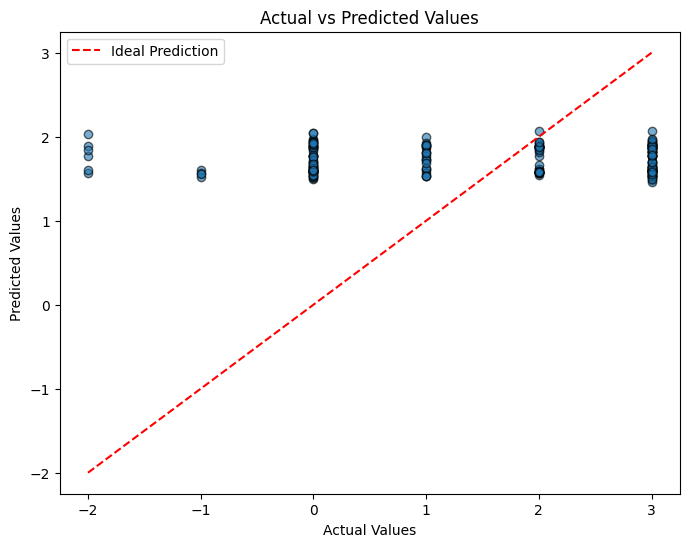

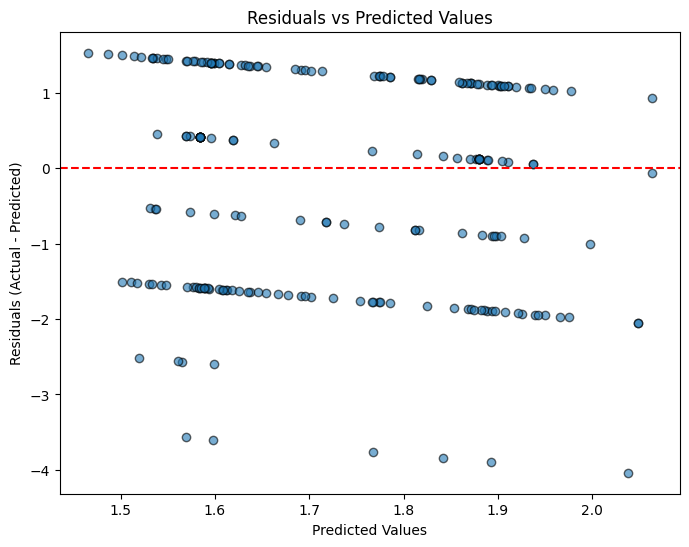

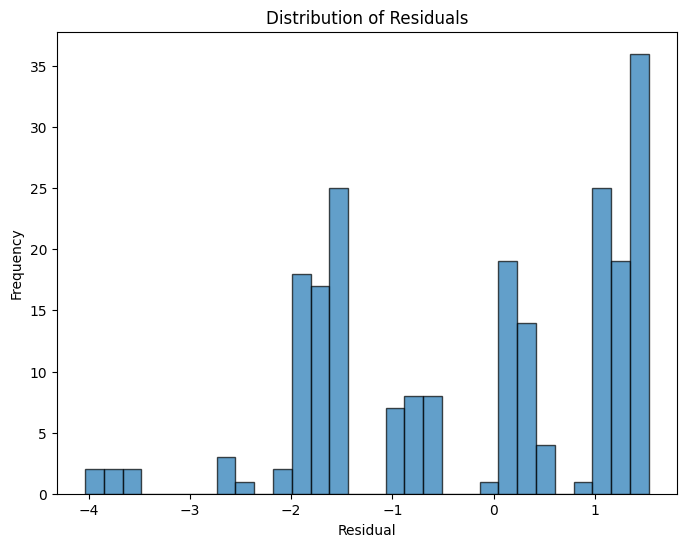

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming model, X_test_tensor, and y_test_tensor are defined and the model is already trained

# Evaluate the model on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = predictions.cpu().numpy().flatten()
    y_true = y_test_tensor.cpu().numpy().flatten()

# 1. Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, predictions, alpha=0.6, edgecolor='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# Plot 45° line for reference
min_val = min(np.min(y_true), np.min(predictions))
max_val = max(np.max(y_true), np.max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
plt.legend()
plt.show()

# 2. Residuals Plot: Residuals (Actual - Predicted) vs Predicted Values
residuals = y_true - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6, edgecolor='k')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='r', linestyle='--')
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Optional: 4. Plot the Training Loss Curve (if you saved loss values during training)
# Assuming you stored your training loss in a list called loss_history
if 'loss_history' in globals():
    plt.figure(figsize=(8, 6))
    plt.plot(loss_history, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Epochs')
    plt.show()


###Classification

In [ ]:

y_ = files.upload()

if isinstance(y_ , dict):
    y_ = list(y_ .keys())[0]  # Extract the file name if files.upload() was used

# Read the CSV file
y_ = pd.read_csv(y_ )

# Display the first few rows
y_.head()

Saving the_y.csv to the_y (2).csv


,0
0,3
1,2
2,3
3,2
4,3


In [ ]:
y = y_

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Suppose X and y are already defined:
# X should be a numpy array with shape (num_examples, 5160)
# y should be a numpy array with values in [-2, -1, 0, 1, 2, 3]

# Create a new variable for classification labels (without editing the original y)
y_c = np.array(y)  # Copy of original labels
unique_labels = np.unique(y_c)
print("Unique labels in original y:", unique_labels)

# Create a mapping: each unique label maps to a new index starting from 0
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
print("Label mapping:", label_mapping)

# Map the labels using the mapping (do not alter the original y)
y_c_mapped = np.vectorize(label_mapping.get)(y_c)
print("Unique mapped labels:", np.unique(y_c_mapped))

# Determine the number of classes from the mapped labels
num_classes = len(unique_labels)

########################################
# 1) Train/test split and prepare PyTorch data
########################################
X_train, X_test, y_train, y_test = train_test_split(X, y_c_mapped, test_size=0.2, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

########################################
# 2) Define the Neural Network Classifier with a larger architecture
########################################
# Input dimension is 5160 and we have num_classes classes.
input_dim = X.shape[1]  # 5160
hidden_dim = 512        # Increased hidden layer size
output_dim = num_classes  # Number of classes based on unique labels

class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ThreeLayerNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),    # 512 -> 256
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim // 4), # 256 -> 128
            nn.ReLU(),
            nn.Linear(hidden_dim // 4, output_dim)       # 128 -> num_classes
        )

    def forward(self, x):
        return self.net(x)

model = ThreeLayerNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

########################################
# 3) Training Loop
########################################
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)  # Outputs shape: [batch_size, num_classes]
        # Ensure batch_y is 1D (shape: [batch_size])
        batch_y = batch_y.view(-1)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)

    epoch_loss /= len(train_dataset)
    loss_history.append(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

########################################
# 4) Evaluation
########################################
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Unique labels in original y: [-2 -1  0  1  2  3]
Label mapping: {-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5}
Unique mapped labels: [0 1 2 3 4 5]
Epoch 10/100, Loss: 1.4417
Epoch 20/100, Loss: 1.4315
Epoch 30/100, Loss: 1.4287
Epoch 40/100, Loss: 1.4207
Epoch 50/100, Loss: 1.4197
Epoch 60/100, Loss: 1.4164
Epoch 70/100, Loss: 1.4091
Epoch 80/100, Loss: 1.4111
Epoch 90/100, Loss: 1.4132
Epoch 100/100, Loss: 1.4102
Accuracy: 0.37850467289719625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        62
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        38
           5       0.38      1.00      0.55        81

    accuracy                           0.38       214
   macro avg       0.06      0.17      0.09       214
weighted avg       0.14      0.38      0.21      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y =

In [ ]:
#!/usr/bin/env python3
import requests
import os
import json
from pathlib import Path

key = os.getenv("NVCF_RUN_KEY") or input("Paste the Run Key: ")

r = requests.post(
    url=os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate"),
    headers={"Authorization": f"Bearer {key}"},
    json={
        "sequence": "ACTGACTGACTGACTG",
        "num_tokens": 8,
        "top_k": 1,
        "enable_sampled_probs": True,
    },
)

if "application/json" in r.headers.get("Content-Type", ""):
    print(r, "Saving to output.json:\n", r.text[:200], "...")
    Path("output.json").write_text(r.text)
elif "application/zip" in r.headers.get("Content-Type", ""):
    print(r, "Saving large response to data.zip")
    Path("data.zip").write_bytes(r.content)
else:
    print(r, r.headers, r.content)

KeyboardInterrupt: Interrupted by user

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# Set PyTorch CUDA allocation configuration to try to avoid fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

########################################
# Read NVIDIA API key once
########################################
RUN_KEY = os.getenv("NVCF_RUN_KEY")
if not RUN_KEY:
    RUN_KEY = input("Paste the Run Key: ")

########################################
# Label unification function
########################################
def unify_label(label_str):
    norm_str = label_str.lower()
    norm_str = norm_str.replace("benign-likely-benign", "likely-benign")
    norm_str = norm_str.replace("pathogenic-likely-pathogenic", "likely-pathogenic")
    parts = [p.strip() for p in norm_str.split(';')]
    unique_labels = set(parts)
    if "pathogenic" in unique_labels:
        return "pathogenic"
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels:
        return "conflicting"
    elif "likely-pathogenic" in unique_labels:
        return "likely-pathogenic"
    elif "uncertain-significance" in unique_labels:
        return "uncertain-significance"
    elif "likely-benign" in unique_labels:
        return "likely-benign"
    elif "benign" in unique_labels:
        return "benign"
    else:
        return "unknown"

########################################
# NVIDIA API call that keeps retrying until a valid representation is returned
########################################
def get_logits_from_nvidia(sequence, run_key):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 8,
        "top_k": 1,
        "enable_sampled_probs": True,
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0
    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()  # Raise error for HTTP status >= 400
            data = r.json()
            logits = data.get("sampled_probs", [])
            if logits and len(logits) > 0:
                return np.array(logits, dtype=float)
            else:
                print("Empty logits received; retrying...")
        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)  # Wait 5 seconds before retrying

########################################
# 1) Load data and unify labels
########################################
df = pd.read_csv("parsed_file_with_flanks_first1000_filtered.csv", nrows=447)
df["UnifiedLabel"] = df["clinical_significance"].apply(unify_label)

# Downsample uncertain-significance group by 50%
df_uncertain = df[df["UnifiedLabel"] == "uncertain-significance"]
df_other = df[df["UnifiedLabel"] != "uncertain-significance"]
df_uncertain_downsampled = df_uncertain.sample(frac=0.5, random_state=42)
df = pd.concat([df_other, df_uncertain_downsampled]).reset_index(drop=True)
print("UnifiedLabel counts after downsampling uncertain-significance:")
print(df["UnifiedLabel"].value_counts())

########################################
# 2) Prepare label mapping
########################################
label_mapping = {
    "pathogenic": 0,
    "conflicting": 1,
    "likely-pathogenic": 2,
    "uncertain-significance": 3,
    "likely-benign": 4,
    "benign": 5
}

########################################
# 3) Extract features using NVIDIA API from mutated sequences
########################################
logits_list = []
for idx, row in df.iterrows():
    mutated_seq = row.get("MutatedSequence_1", "")
    if not isinstance(mutated_seq, str) or mutated_seq.strip() == "":
        print(f"Row {idx} has empty mutated sequence; using zeros.")
        logits_list.append(np.zeros(8))
        continue
    mutated_seq = mutated_seq.strip()
    # Truncate the DNA sequence to 20 bases
    if len(mutated_seq) > 20:
        mutated_seq = mutated_seq[:20]
    print(f"Processing row {idx}, sequence: {mutated_seq}")
    logits = get_logits_from_nvidia(mutated_seq, RUN_KEY)
    logits_list.append(logits)

X = np.vstack(logits_list)
y = df["UnifiedLabel"].map(label_mapping).values

########################################
# 4) Train/test split and model training
########################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))


Paste the Run Key: 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
UnifiedLabel counts after downsampling uncertain-significance:
UnifiedLabel
uncertain-significance    106
benign                     88
likely-benign              88
pathogenic                 34
conflicting                15
likely-pathogenic          11
Name: count, dtype: int64
Processing row 0, sequence: TGCCACCACACCTGGCTAAT
Processing row 1, sequence: CGCCCAGCCATAGGATTATG
Processing row 2, sequence: GTGAGCCACTGCGCCCAGCC
HTTP Error 422: {"type":"urn:inference-service:problem-details:unprocessable-entity","title":"Unprocessable Entity","status":422,"detail":"CUDA error: an illegal memory access was encountered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n"}. Retrying...
Retry attempt #1 for sequen

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
########################################
# 5) Define a neural network model with 3 hidden layers
########################################
# Determine input dimension from X (sampled_probs length + logits length)
input_dim = X.shape[1]
output_dim = len(label_mapping)

class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ThreeLayerNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = ThreeLayerNN(input_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler: reduce lr if loss doesn't improve
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

########################################
# 6) Training loop
########################################
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_dataset)

    # Step the scheduler
    scheduler.step(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

########################################
# 7) Evaluation
########################################
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 10/2000, Loss: 1.5321
Epoch 20/2000, Loss: 1.5449
Epoch 30/2000, Loss: 1.5417
Epoch 40/2000, Loss: 1.5188
Epoch 50/2000, Loss: 1.5055
Epoch 60/2000, Loss: 1.5026
Epoch 70/2000, Loss: 1.5374
Epoch 80/2000, Loss: 1.5266
Epoch 90/2000, Loss: 1.5302
Epoch 100/2000, Loss: 1.5080
Epoch 110/2000, Loss: 1.5128
Epoch 120/2000, Loss: 1.5174
Epoch 130/2000, Loss: 1.4981
Epoch 140/2000, Loss: 1.4994
Epoch 150/2000, Loss: 1.5073
Epoch 160/2000, Loss: 1.5117
Epoch 170/2000, Loss: 1.5008
Epoch 180/2000, Loss: 1.5103
Epoch 190/2000, Loss: 1.5062
Epoch 200/2000, Loss: 1.5136
Epoch 210/2000, Loss: 1.4997
Epoch 220/2000, Loss: 1.5025
Epoch 230/2000, Loss: 1.5065
Epoch 240/2000, Loss: 1.5051
Epoch 250/2000, Loss: 1.4730
Epoch 260/2000, Loss: 1.4869
Epoch 270/2000, Loss: 1.5111
Epoch 280/2000, Loss: 1.5081
Epoch 290/2000, Loss: 1.5063
Epoch 300/2000, Loss: 1.4973
Epoch 310/2000, Loss: 1.5174
Epoch 320/2000, Loss: 1.5011
Epoch 330/2000, Loss: 1.5004
Epoch 340/2000, Loss: 1.4976
Epoch 350/2000, Loss: 1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


X shape: (342, 8)


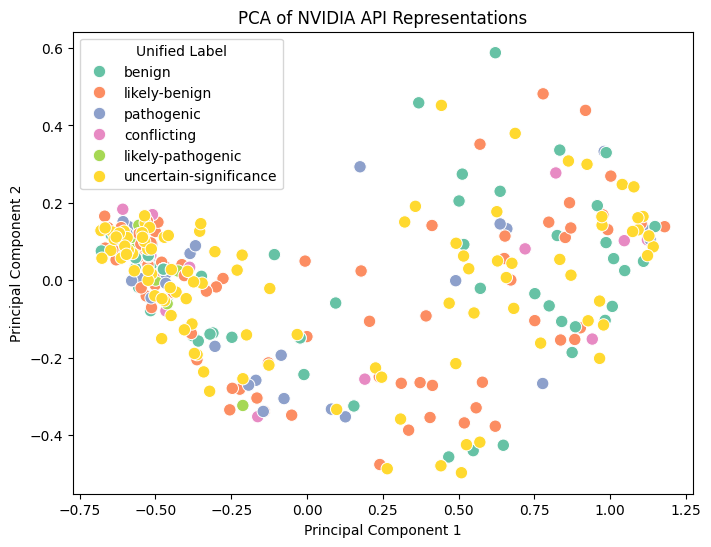

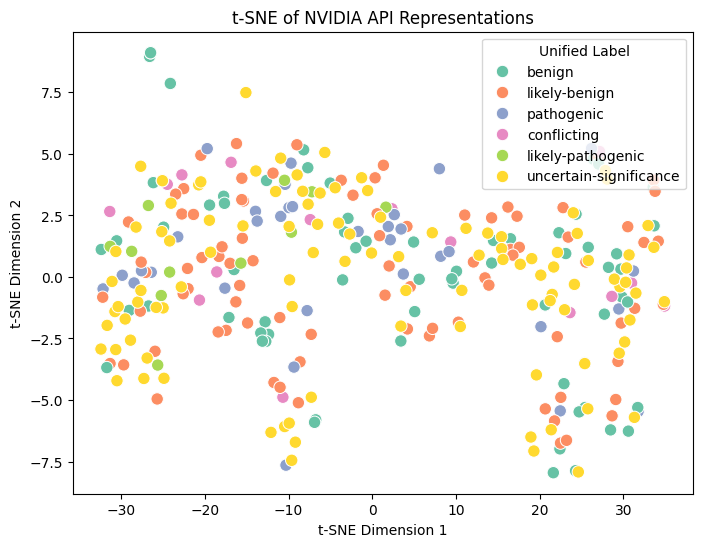

[[0.93787664 0.94595504 0.9514901  0.87783206 0.57240677 0.92711633
  0.91267884 0.92134011]
 [0.29180208 0.33575544 0.31440902 0.35945368 0.27720773 0.35142347
  0.44745934 0.32236809]
 [0.43154526 0.30755645 0.33643493 0.48148793 0.43819624 0.43942735
  0.40971476 0.46718159]
 [0.33366245 0.33548018 0.33589667 0.40269816 0.41868874 0.48935115
  0.53817976 0.57036716]
 [0.35359564 0.33108121 0.30925813 0.33463347 0.33496043 0.32224554
  0.44539261 0.58610815]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Assume X and y are already in your environment ---
# For example, if you saved them to disk:
# X = np.load("X.npy")
# y = np.load("y.npy")

print("X shape:", X.shape)

# Create column names based on number of features
feature_cols = [f"f{i}" for i in range(X.shape[1])]
df_repr = pd.DataFrame(X, columns=feature_cols)

# Map numeric labels back to unified label names.
label_mapping = {
    0: "pathogenic",
    1: "conflicting",
    2: "likely-pathogenic",
    3: "uncertain-significance",
    4: "likely-benign",
    5: "benign"
}
df_repr["label"] = [label_mapping.get(val, "unknown") for val in y]

if X.shape[1] >= 2:
    # ----- PCA Analysis -----
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    df_repr["PCA1"] = X_pca[:, 0]
    df_repr["PCA2"] = X_pca[:, 1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_repr, x="PCA1", y="PCA2", hue="label", palette="Set2", s=80)
    plt.title("PCA of NVIDIA API Representations")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Unified Label")
    plt.show()

    # ----- t-SNE Analysis -----
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    df_repr["TSNE1"] = X_tsne[:, 0]
    df_repr["TSNE2"] = X_tsne[:, 1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_repr, x="TSNE1", y="TSNE2", hue="label", palette="Set2", s=80)
    plt.title("t-SNE of NVIDIA API Representations")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Unified Label")
    plt.show()
else:
    print("Representation is 1-dimensional; using alternative visualizations.")
    # ----- Histogram by label -----
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_repr, x="f0", hue="label", kde=True, palette="Set2", element="step")
    plt.title("Distribution of 1D NVIDIA API Representation")
    plt.xlabel("Representation Value")
    plt.ylabel("Count")
    plt.show()

    # ----- Violin Plot by label -----
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df_repr, x="label", y="f0", palette="Set2")
    plt.title("Violin Plot of 1D NVIDIA API Representation by Label")
    plt.xlabel("Unified Label")
    plt.ylabel("Representation Value")
    plt.show()
print(X[:5])

In [ ]:
logit_1, data_1 = get_logits_from_nvidia_2('GCCC', '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')

HTTP Error 422: {"type":"urn:inference-service:problem-details:unprocessable-entity","title":"Unprocessable Entity","status":422,"detail":"CUDA error: an illegal memory access was encountered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n"}. Retrying...
Retry attempt #1 for sequence: GCCC


In [ ]:
print(logit_1, data_1, np.array(logit_1))

[0.2781814634799957] [ -8.6875     -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.         -22.75       -22.75
 -20.5        -22.75       -22.75       -22.75       -22.75
 -22.75       -22.75       -22.75       -22.75       -22.75
 -22.5        -22.75       -22.75       -22.125      -22.125
 -22.375      -22.375      -22.375      -21.875      -22.375
 -22.375      -22.375      -22.375      -22.75       -21.125
 -22.75       -22.75       -22.75       -22.75       -16.875
   0.51171875 -20.875        0.37304688 -20.75       -20.75
 -21.875        0.35546875 -21.25       -21.25       -22.5
 -18.375      -21.5        -18.25       -14.875      -21.125
 -21.375      -

In [ ]:
def get_logits_from_nvidia_2(sequence, run_key):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 1,  # Use one token only.
        "top_k": 1,
        "enable_sampled_probs": True,
        "enable_logits": True,
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0

    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()  # Raises HTTPError for bad responses
            data = r.json()
            logits = data.get("sampled_probs", [])
            true_logits = data.get("logits", [])
            true_logits = np.array(true_logits, dtype=float).flatten()

            if logits:
                # Return the original logits values as received from the API.
                return logits, true_logits
            else:
                print("No logits in response; retrying...")
        except requests.exceptions.HTTPError:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)

In [ ]:
import os
import requests
import time

def get_embeddings_from_nvidia(sequence, run_key):
    # Adjust the URL if needed; here we assume the same endpoint is used.
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        # Instead of generating tokens, we request the embedding of the input.
        "num_tokens": 0,  # No additional tokens are generated.
        "return_embeddings": True,  # Hypothetical flag to return embeddings.
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0

    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()  # Raises HTTPError for bad responses
            data = r.json()
            embeddings = data.get("embeddings", [])
            if embeddings:
                return embeddings
            else:
                print("No embeddings in response; retrying...")
        except requests.exceptions.HTTPError:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)


In [ ]:
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set PyTorch CUDA allocation configuration to help avoid fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

########################################
# Read NVIDIA API key once
########################################
RUN_KEY = os.getenv("NVCF_RUN_KEY")
if not RUN_KEY:
    RUN_KEY = input("Paste the Run Key: ")

########################################
# Label unification function
########################################
def unify_label(label_str):
    norm_str = label_str.lower()
    norm_str = norm_str.replace("benign-likely-benign", "likely-benign")
    norm_str = norm_str.replace("pathogenic-likely-pathogenic", "likely-pathogenic")
    parts = [p.strip() for p in norm_str.split(';')]
    unique_labels = set(parts)
    if "pathogenic" in unique_labels:
        return "pathogenic"
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels:
        return "conflicting"
    elif "likely-pathogenic" in unique_labels:
        return "likely-pathogenic"
    elif "uncertain-significance" in unique_labels:
        return "uncertain-significance"
    elif "likely-benign" in unique_labels:
        return "likely-benign"
    elif "benign" in unique_labels:
        return "benign"
    else:
        return "unknown"

########################################
# NVIDIA API call that returns both sampled_probs and logits.
# According to the Evo 2 NIM docs, if "enable_logits": True is set,
# the response will include:
#   - "sampled_probs": a list of probabilities (length = output sequence length)
#   - "logits": an array of shape [num_tokens, 512]
# Here, we set num_tokens to 10 so logits will be [10, 512] (flattened to 5120).
########################################
def get_logits_from_nvidia_2(sequence, run_key):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 10,  # Generate 10 tokens
        "top_k": 1,
        "enable_sampled_probs": True,
        "enable_logits": True,  # Request logits output
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0
    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()
            data = r.json()
            sp = data.get("sampled_probs", [])
            lt = data.get("logits", None)
            if lt is not None:
                lt_arr = np.array(lt, dtype=float).flatten()  # flatten entire array
            else:
                lt_arr = np.array([])
            # Check that we have both sampled_probs and logits
            if sp and lt_arr.size > 0:
                return np.array(sp, dtype=float), lt_arr, data
            else:
                print("Incomplete output (sampled_probs or logits missing); retrying...")
        except requests.exceptions.HTTPError:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)

########################################
# 1) Load data and unify labels
########################################
# (Assuming 'df' is already loaded from your CSV; if not, load it here)
# For example:
# df = pd.read_csv("parsed_file_with_flanks_first1000_filtered.csv", nrows=447)

df["UnifiedLabel"] = df["clinical_significance"].apply(unify_label)

# Downsample the "uncertain-significance" group by 50%
df_uncertain = df[df["UnifiedLabel"] == "uncertain-significance"]
df_other = df[df["UnifiedLabel"] != "uncertain-significance"]
df_uncertain_downsampled = df_uncertain.sample(frac=0.5, random_state=42)
df = pd.concat([df_other, df_uncertain_downsampled]).reset_index(drop=True)
print("UnifiedLabel counts after downsampling uncertain-significance:")
print(df["UnifiedLabel"].value_counts())

########################################
# 2) Prepare label mapping
########################################
label_mapping = {
    "pathogenic": 0,
    "conflicting": 1,
    "likely-pathogenic": 2,
    "uncertain-significance": 3,
    "likely-benign": 4,
    "benign": 5
}

########################################
# 3) Extract features using NVIDIA API from mutated sequences.
#    Truncate each mutated sequence to 40 bases.
#    For each sequence, get both sampled_probs and logits,
#    then concatenate them along axis 0.
#    With num_tokens=10, we expect sampled_probs to be of length 10
#    and logits to be [10,512] (flattened to 5120), so total features = 10+5120 = 5130.
########################################
features_list = []
for idx, row in df.iterrows():
    mutated_seq = row.get("MutatedSequence_1", "")
    if not isinstance(mutated_seq, str) or mutated_seq.strip() == "":
        print(f"Row {idx} has empty mutated sequence; using zeros.")
        features_list.append(np.zeros(10 + 10 * 512))  # 10 + 5120 = 5130
        continue
    mutated_seq = mutated_seq.strip()
    # Truncate to 40 bases if longer
    if len(mutated_seq) > 40:
        mutated_seq = mutated_seq[:40]
    print(f"Processing row {idx}, sequence: {mutated_seq}")
    sp, lt, full_data = get_logits_from_nvidia_2(mutated_seq, RUN_KEY)
    feat = np.concatenate([sp, lt])  # sp shape: (10,), lt shape: (5120,) => total 5130
    features_list.append(feat)

# Convert list of features to a 2D NumPy array.
X = np.vstack(features_list)
y = df["UnifiedLabel"].map(label_mapping).values

########################################
# 4) Train/test split and prepare PyTorch data
########################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

########################################
# 5) Define a neural network model with 3 hidden layers
########################################
# Input dimension now equals 5130 (10 sampled_probs + 5120 logits)
input_dim = X.shape[1]
hidden_dim = 128  # increased capacity
output_dim = len(label_mapping)

class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ThreeLayerNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.ReLU(),
            nn.Linear(hidden_dim // 4, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = ThreeLayerNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

########################################
# 6) Training loop
########################################
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_dataset)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

########################################
# 7) Evaluation
########################################
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")



Paste the Run Key: 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
UnifiedLabel counts after downsampling uncertain-significance:
UnifiedLabel
uncertain-significance    106
benign                     88
likely-benign              88
pathogenic                 34
conflicting                15
likely-pathogenic          11
Name: count, dtype: int64
Processing row 0, sequence: TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGA
Processing row 1, sequence: CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGT
Processing row 2, sequence: GTGAGCCACTGCGCCCAGCCATAGGATTATGTCTCTTTTA


KeyboardInterrupt: 

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set PyTorch CUDA allocation configuration to help avoid fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

########################################
# Read NVIDIA API key once
########################################
RUN_KEY = os.getenv("NVCF_RUN_KEY")
if not RUN_KEY:
    RUN_KEY = input("Paste the Run Key: ")

########################################
# Label unification function
########################################
def unify_label(label_str):
    norm_str = label_str.lower()
    norm_str = norm_str.replace("benign-likely-benign", "likely-benign")
    norm_str = norm_str.replace("pathogenic-likely-pathogenic", "likely-pathogenic")
    parts = [p.strip() for p in norm_str.split(';')]
    unique_labels = set(parts)
    if "pathogenic" in unique_labels:
        return "pathogenic"
    elif "conflicting-interpretations-of-pathogenicity" in unique_labels:
        return "conflicting"
    elif "likely-pathogenic" in unique_labels:
        return "likely-pathogenic"
    elif "uncertain-significance" in unique_labels:
        return "uncertain-significance"
    elif "likely-benign" in unique_labels:
        return "likely-benign"
    elif "benign" in unique_labels:
        return "benign"
    else:
        return "unknown"

########################################
# NVIDIA API call that returns both sampled_probs and logits.
# We now request:
#  - num_tokens = 10 (so sampled_probs is of length 10)
#  - enable_logits = True (logits shape: [10, 512], flattened to 5120)
# The concatenated feature vector will be of length 10 + 5120 = 5130.
########################################
def get_logits_from_nvidia_2(sequence, run_key):
    url = os.getenv("URL", "https://health.api.nvidia.com/v1/biology/arc/evo2-40b/generate")
    payload = {
        "sequence": sequence,
        "num_tokens": 10,
        "top_k": 1,
        "enable_sampled_probs": True,
        "enable_logits": True,
    }
    headers = {"Authorization": f"Bearer {run_key}"}
    retry_count = 0
    while True:
        try:
            r = requests.post(url=url, headers=headers, json=payload, timeout=30)
            r.raise_for_status()
            data = r.json()
            sp = data.get("sampled_probs", [])
            lt = data.get("logits", None)
            if lt is not None:
                lt_arr = np.array(lt, dtype=float).flatten()  # Expecting shape [10,512] -> (5120,)
            else:
                lt_arr = np.array([])
            if sp and lt_arr.size > 0:
                return np.array(sp, dtype=float), lt_arr, data
            else:
                print("Incomplete output (sampled_probs or logits missing); retrying...")
        except requests.exceptions.HTTPError:
            print(f"HTTP Error {r.status_code}: {r.text}. Retrying...")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Retrying...")
        retry_count += 1
        print(f"Retry attempt #{retry_count} for sequence: {sequence}")
        time.sleep(5)

########################################
# 1) Load data and unify labels
########################################
# (Assuming your dataframe 'df' is already loaded)
df["UnifiedLabel"] = df["clinical_significance"].apply(unify_label)

# Downsample the "uncertain-significance" group by 50%
df_uncertain = df[df["UnifiedLabel"] == "uncertain-significance"]
df_other = df[df["UnifiedLabel"] != "uncertain-significance"]
df_uncertain_downsampled = df_uncertain.sample(frac=0.5, random_state=42)
df = pd.concat([df_other, df_uncertain_downsampled]).reset_index(drop=True)
print("UnifiedLabel counts after downsampling uncertain-significance:")
print(df["UnifiedLabel"].value_counts())

########################################
# 2) Prepare label mapping
########################################
label_mapping = {
    "pathogenic": 0,
    "conflicting": 1,
    "likely-pathogenic": 2,
    "uncertain-significance": 3,
    "likely-benign": 4,
    "benign": 5
}

########################################
# 3) Extract features using NVIDIA API from mutated sequences.
#    Truncate each mutated sequence to 40 bases.
#    For each sequence, get both sampled_probs and logits,
#    then concatenate them.
#    Expected feature length: 10 (sampled_probs) + 5120 (logits) = 5130.
########################################
features_list = []
for idx, row in df.iterrows():
    mutated_seq = row.get("MutatedSequence_1", "")
    if not isinstance(mutated_seq, str) or mutated_seq.strip() == "":
        print(f"Row {idx} has empty mutated sequence; using zeros.")
        features_list.append(np.zeros(5130))
        continue
    mutated_seq = mutated_seq.strip()
    if len(mutated_seq) > 40:
        mutated_seq = mutated_seq[:40]
    print(f"Processing row {idx}, sequence: {mutated_seq}")
    sp, lt, full_data = get_logits_from_nvidia_2(mutated_seq, RUN_KEY)
    feat = np.concatenate([sp, lt])
    features_list.append(feat)

X = np.vstack(features_list)
y = df["UnifiedLabel"].map(label_mapping).values

########################################
# 4) Train/test split and prepare PyTorch data
########################################
# Optional: Standardize features for improved convergence.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

########################################
# 5) Define a neural network model with 3 hidden layers
########################################
# Input dimension is 5130.
input_dim = X_train.shape[1]  # Expected: 5130
output_dim = len(label_mapping)

class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ThreeLayerNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = ThreeLayerNN(input_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

########################################
# 6) Training loop
########################################
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_dataset)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

########################################
# 7) Evaluation
########################################
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))


Paste the Run Key: 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
UnifiedLabel counts after downsampling uncertain-significance:
UnifiedLabel
benign                    88
likely-benign             88
pathogenic                34
conflicting               15
likely-pathogenic         11
uncertain-significance     6
Name: count, dtype: int64
Processing row 0, sequence: TGCCACCACACCTGGCTAATTTTTGTATTTTTAGTAGAGA
Processing row 1, sequence: CGCCCAGCCATAGGATTATGTCTCTTTTATGTTTGTTTGT
Processing row 2, sequence: GTGAGCCACTGCGCCCAGCCATAGGATTATGTCTCTTTTA
Processing row 3, sequence: TACACTTATAATATACATTTTCTTATTTGTAAACCACACT
Processing row 4, sequence: AAGCTTCCAGTTACTAGGAAATAAACATTTATTGTAGATT
Processing row 5, sequence: AGAATGGTGTGAACCCGGGAGGTGGAGCTTGCAGTGAGCT
HTTP Error 422: {"type":"urn:inference-service:problem-details:unprocessable-entity","title":"Unprocessable Entity","status":422,"detail":"CUDA error: an illegal memory access was encountered\nCUDA kernel errors might be

KeyboardInterrupt: 

In [ ]:
X.shape

(249, 5130)